In [1]:
#Loading packages 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pingouin
from datetime import datetime

In [2]:
#df = pd.read_csv('data.csv')
#zillow home data
zhome_values_zip = pd.read_csv('zhome_value_zip_df.csv')
df_home = pd.DataFrame(zhome_values_zip)

#zillow rent data
df = pd.read_csv("z_rentals_zip_df.csv")
df_rent = pd.DataFrame(df)
#print(zillow_home_values_data)

In [3]:
# z stands for zillow

df_home
df_rent

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,1219.960876,...,1655.486502,1690.358839,1703.208080,1711.182350,1692.088914,1689.688959,1720.958688,1755.355181,1756.105984,1744.762698
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1457.220113,...,1751.402759,1750.489815,1745.850412,1761.307227,1771.027384,1791.684918,1811.410335,1816.428083,1828.923975,1817.194565
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1262.982761,1266.784630,1280.314235,1266.605631,1262.631977,1277.776160,1323.625994,1352.914175,1363.806049,1341.541667
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039.500000
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2216.568524,...,2683.419811,2722.761276,2749.056690,2808.501349,2853.536189,2956.043484,3021.904547,3080.800631,3081.106609,3087.509333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,62010,22136,11109,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2790.271936,...,3744.652915,3798.539137,3837.995019,3890.597861,3937.307392,3970.047632,4053.371915,4061.166251,4115.439233,4121.017857
5984,91695,22596,77046,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,NaN,...,1768.528993,1777.221016,1753.410256,1767.636773,1783.002889,1799.016600,1788.790345,1743.148800,1750.740307,1799.969697
5985,60648,23294,7311,zip,NJ,NJ,Jersey City,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,NaN,...,3505.420927,3531.959132,3579.191128,3618.283707,3737.150649,3843.504379,3943.345632,3963.143394,3958.403247,3892.430159
5986,97583,23537,94129,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,NaN,...,NaN,NaN,NaN,NaN,NaN,4622.954550,4611.675367,4635.920272,4476.368782,4394.833333


In [4]:
#zillow home_values columns
before_2002 = df_home.columns[9:33]  #columns 9 -3 3 are dates 01/2000 - 12/2001.
drop_extra_columns = ['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro']
df_home = df_home.drop(before_2002, axis=1)
df_home = df_home.drop(drop_extra_columns, axis=1)

#zillow_rent columns
columns_dropped = ["RegionID", "SizeRank", "RegionType", "StateName", "Metro"]
df_rent = df_rent.drop(columns_dropped, axis=1)

In [5]:
#new columns 
df_home.columns


Index(['RegionName', 'State', 'City', 'CountyName', '2002-01-31', '2002-02-28',
       '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30',
       ...
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31'],
      dtype='object', length=254)

In [6]:
df_rent.columns

Index(['RegionName', 'State', 'City', 'CountyName', '2015-03-31', '2015-04-30',
       '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30',
       '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
       '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
       '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
       '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
       '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
       '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
       '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-3

In [7]:
#new dataframe

df_rent

,RegionName,State,City,CountyName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,77449,TX,NaN,Harris County,1219.960876,1233.842880,1238.850686,1241.726304,1242.263065,1249.639726,...,1655.486502,1690.358839,1703.208080,1711.182350,1692.088914,1689.688959,1720.958688,1755.355181,1756.105984,1744.762698
1,77494,TX,NaN,Fort Bend County,1457.220113,1452.669597,1456.369395,1453.983141,1455.707634,1466.345649,...,1751.402759,1750.489815,1745.850412,1761.307227,1771.027384,1791.684918,1811.410335,1816.428083,1828.923975,1817.194565
2,79936,TX,El Paso,El Paso County,NaN,NaN,NaN,NaN,NaN,NaN,...,1262.982761,1266.784630,1280.314235,1266.605631,1262.631977,1277.776160,1323.625994,1352.914175,1363.806049,1341.541667
3,11368,NY,New York,Queens County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039.500000
4,11385,NY,New York,Queens County,2216.568524,2254.288368,2286.711172,2333.550973,2349.592142,2332.598267,...,2683.419811,2722.761276,2749.056690,2808.501349,2853.536189,2956.043484,3021.904547,3080.800631,3081.106609,3087.509333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,11109,NY,New York,Queens County,2790.271936,2890.135290,2959.800260,2967.284934,2930.235747,2889.301352,...,3744.652915,3798.539137,3837.995019,3890.597861,3937.307392,3970.047632,4053.371915,4061.166251,4115.439233,4121.017857
5984,77046,TX,Houston,Harris County,NaN,NaN,NaN,NaN,NaN,NaN,...,1768.528993,1777.221016,1753.410256,1767.636773,1783.002889,1799.016600,1788.790345,1743.148800,1750.740307,1799.969697
5985,7311,NJ,Jersey City,Hudson County,NaN,NaN,NaN,NaN,NaN,NaN,...,3505.420927,3531.959132,3579.191128,3618.283707,3737.150649,3843.504379,3943.345632,3963.143394,3958.403247,3892.430159
5986,94129,CA,San Francisco,San Francisco County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4622.954550,4611.675367,4635.920272,4476.368782,4394.833333


In [8]:
df_home

,RegionName,State,City,CountyName,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,77449,TX,NaN,Harris County,109098.0,109275.0,109851.0,110447.0,110979.0,111372.0,...,257089.0,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0
1,77494,TX,NaN,Fort Bend County,226810.0,226495.0,227382.0,228050.0,229150.0,229897.0,...,444749.0,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0
2,79936,TX,El Paso,El Paso County,85005.0,84857.0,85087.0,85249.0,85512.0,85695.0,...,175658.0,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0
3,11368,NY,New York,Queens County,249885.0,253132.0,255453.0,257730.0,259524.0,261847.0,...,564682.0,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0
4,11385,NY,New York,Queens County,333404.0,333069.0,332550.0,331469.0,333280.0,335968.0,...,747687.0,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,17762,PA,Hughesville,Lycoming County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147664.0,151285.0
27420,50160,IA,Martensdale,Warren County,NaN,NaN,NaN,NaN,NaN,NaN,...,175734.0,179142.0,180164.0,181149.0,182351.0,184956.0,186832.0,188379.0,190213.0,191794.0
27421,18081,PA,Hellertown,Bucks County,NaN,NaN,NaN,NaN,NaN,NaN,...,354365.0,356878.0,362437.0,368824.0,372757.0,373071.0,372062.0,370075.0,369514.0,370807.0
27422,51009,IA,Calumet,O Brien County,NaN,NaN,NaN,NaN,NaN,NaN,...,71091.0,72012.0,72555.0,72780.0,72984.0,73967.0,74786.0,75141.0,74819.0,75065.0


In [9]:
# creating new dataframe with the name of the columns replaced

#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)

df_home2 = df_home.rename({'RegionName' : 'zip_code', 'State' : 'state',
                                           'City' : 'city', 'CountyName' : 'borough'}, axis = 1)

df_rent2 = df_rent.rename({"RegionName" : "zip_code", "State" : "state",
                "City" : "city", "CountyName" : "borough"}, axis = 1)

In [10]:
#new dataframe with columns renamed

df_home2


,zip_code,state,city,borough,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,77449,TX,NaN,Harris County,109098.0,109275.0,109851.0,110447.0,110979.0,111372.0,...,257089.0,261757.0,267452.0,273750.0,279865.0,284916.0,288326.0,290250.0,290894.0,291871.0
1,77494,TX,NaN,Fort Bend County,226810.0,226495.0,227382.0,228050.0,229150.0,229897.0,...,444749.0,454220.0,465824.0,479498.0,490869.0,498347.0,500609.0,498747.0,499289.0,501368.0
2,79936,TX,El Paso,El Paso County,85005.0,84857.0,85087.0,85249.0,85512.0,85695.0,...,175658.0,177626.0,179773.0,183128.0,186726.0,190164.0,192396.0,194095.0,195477.0,197127.0
3,11368,NY,New York,Queens County,249885.0,253132.0,255453.0,257730.0,259524.0,261847.0,...,564682.0,564481.0,566396.0,567898.0,570676.0,572891.0,574998.0,575933.0,578691.0,582277.0
4,11385,NY,New York,Queens County,333404.0,333069.0,332550.0,331469.0,333280.0,335968.0,...,747687.0,750970.0,756670.0,759268.0,765087.0,770360.0,775517.0,778187.0,781268.0,787104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,17762,PA,Hughesville,Lycoming County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147664.0,151285.0
27420,50160,IA,Martensdale,Warren County,NaN,NaN,NaN,NaN,NaN,NaN,...,175734.0,179142.0,180164.0,181149.0,182351.0,184956.0,186832.0,188379.0,190213.0,191794.0
27421,18081,PA,Hellertown,Bucks County,NaN,NaN,NaN,NaN,NaN,NaN,...,354365.0,356878.0,362437.0,368824.0,372757.0,373071.0,372062.0,370075.0,369514.0,370807.0
27422,51009,IA,Calumet,O Brien County,NaN,NaN,NaN,NaN,NaN,NaN,...,71091.0,72012.0,72555.0,72780.0,72984.0,73967.0,74786.0,75141.0,74819.0,75065.0


In [11]:
df_rent2

,zip_code,state,city,borough,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,77449,TX,NaN,Harris County,1219.960876,1233.842880,1238.850686,1241.726304,1242.263065,1249.639726,...,1655.486502,1690.358839,1703.208080,1711.182350,1692.088914,1689.688959,1720.958688,1755.355181,1756.105984,1744.762698
1,77494,TX,NaN,Fort Bend County,1457.220113,1452.669597,1456.369395,1453.983141,1455.707634,1466.345649,...,1751.402759,1750.489815,1745.850412,1761.307227,1771.027384,1791.684918,1811.410335,1816.428083,1828.923975,1817.194565
2,79936,TX,El Paso,El Paso County,NaN,NaN,NaN,NaN,NaN,NaN,...,1262.982761,1266.784630,1280.314235,1266.605631,1262.631977,1277.776160,1323.625994,1352.914175,1363.806049,1341.541667
3,11368,NY,New York,Queens County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2039.500000
4,11385,NY,New York,Queens County,2216.568524,2254.288368,2286.711172,2333.550973,2349.592142,2332.598267,...,2683.419811,2722.761276,2749.056690,2808.501349,2853.536189,2956.043484,3021.904547,3080.800631,3081.106609,3087.509333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,11109,NY,New York,Queens County,2790.271936,2890.135290,2959.800260,2967.284934,2930.235747,2889.301352,...,3744.652915,3798.539137,3837.995019,3890.597861,3937.307392,3970.047632,4053.371915,4061.166251,4115.439233,4121.017857
5984,77046,TX,Houston,Harris County,NaN,NaN,NaN,NaN,NaN,NaN,...,1768.528993,1777.221016,1753.410256,1767.636773,1783.002889,1799.016600,1788.790345,1743.148800,1750.740307,1799.969697
5985,7311,NJ,Jersey City,Hudson County,NaN,NaN,NaN,NaN,NaN,NaN,...,3505.420927,3531.959132,3579.191128,3618.283707,3737.150649,3843.504379,3943.345632,3963.143394,3958.403247,3892.430159
5986,94129,CA,San Francisco,San Francisco County,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4622.954550,4611.675367,4635.920272,4476.368782,4394.833333


In [12]:
#df = df.melt(id_vars=["location", "name"], 
#         var_name="Date", 
#         value_name="Value"

#replacing the '2002-01-31 colums to 'Date' and assiging their values.
#home data
df_home2 = df_home2.melt(id_vars=['zip_code', 'state', 'city', 'borough'], 
                                                       var_name= "date", 
                                                       value_name= "home_value")
#rent data
df_rent2 = df_rent2.melt(id_vars=["zip_code", "state", "city", "borough"], 
                                    var_name= "date", 
                                    value_name= "mean_rent")

In [13]:
#new columns with dates as rows

df_home2.columns


Index(['zip_code', 'state', 'city', 'borough', 'date', 'home_value'], dtype='object')

In [14]:
df_rent2.columns

Index(['zip_code', 'state', 'city', 'borough', 'date', 'mean_rent'], dtype='object')

In [15]:
#changing date column to datetime
#zillow home
df_home2['date'] = pd.to_datetime(df_home2["date"])
df_home2["borough"] = df_home2["borough"].astype(str)
df_home2["home_value"] = df_home2["home_value"].astype(float)

#zillow rent
df_rent2["date"] = pd.to_datetime(df_rent2["date"])
df_rent2["borough"] = df_rent2["borough"].astype(str)
df_rent2["mean_rent"] = df_rent2["mean_rent"].astype(float)

#dhange each column to correct type

In [16]:
#    li = ['Albert', 'Louis', 'John']
#    df[df.name.isin(li)]

#creating new df where only the word NY pulls from the State column.
#zillow home data
ny_column = ['NY']

df_home2 = df_home2[df_home2.state.isin(ny_column)]


#zillow rent data
ny_rent = ["NY"]

df_rent2 = df_rent2[df_rent2.state.isin(ny_rent)]

In [17]:
#new data frame with the column, state, only has NY

df_home2

,zip_code,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6855924,12724,NY,Jeffersonville,Sullivan County,2022-10-31,340127.0
6855940,14539,NY,Retsof,Livingston County,2022-10-31,152636.0
6855942,14134,NY,Chaffee,Erie County,2022-10-31,209295.0
6855979,12420,NY,Pine Bush,Ulster County,2022-10-31,425590.0


In [18]:
df_rent2

,zip_code,state,city,borough,date,mean_rent
3,11368,NY,New York,Queens County,2015-03-31,NaN
4,11385,NY,New York,Queens County,2015-03-31,2216.568524
10,11236,NY,New York,Kings County,2015-03-31,NaN
12,11208,NY,New York,Kings County,2015-03-31,NaN
13,10467,NY,New York,Bronx County,2015-03-31,1303.888993
...,...,...,...,...,...,...
550855,10004,NY,New York,New York County,2022-10-31,4823.220238
550869,10006,NY,New York,New York County,2022-10-31,4180.540793
550888,11976,NY,Water Mill,Suffolk County,2022-10-31,58555.500000
550891,11109,NY,New York,Queens County,2022-10-31,4121.017857


In [19]:
#selecting only 5 boro counties in county_name column
#zillow home
five_boros_home = df_home2[df_home2['borough'].isin(['Queens County', 'New York County', 'Bronx County', 'Richmond County', 'Kings County'])]

#zillow rent
five_boros_rent = df_rent2[df_rent2["borough"].isin(["Queens County", "New York County", "Bronx County", "Richmond County", "Kings County"])]

In [21]:
# new dataframe

five_boros_home


,zip_code,state,city,borough,date,home_value
3,11368,NY,New York,Queens County,2002-01-31,249885.0
4,11385,NY,New York,Queens County,2002-01-31,333404.0
11,11236,NY,New York,Kings County,2002-01-31,255687.0
14,11208,NY,New York,Kings County,2002-01-31,235676.0
15,10467,NY,New York,Bronx County,2002-01-31,174696.0
...,...,...,...,...,...,...
6842233,10464,NY,New York,Bronx County,2022-10-31,609781.0
6843716,10004,NY,New York,New York County,2022-10-31,1081807.0
6845613,10006,NY,New York,New York County,2022-10-31,902566.0
6855021,11243,NY,New York,Kings County,2022-10-31,1426544.0


In [22]:
five_boros_rent

,zip_code,state,city,borough,date,mean_rent
3,11368,NY,New York,Queens County,2015-03-31,NaN
4,11385,NY,New York,Queens County,2015-03-31,2216.568524
10,11236,NY,New York,Kings County,2015-03-31,NaN
12,11208,NY,New York,Kings County,2015-03-31,NaN
13,10467,NY,New York,Bronx County,2015-03-31,1303.888993
...,...,...,...,...,...,...
550797,10282,NY,New York,New York County,2022-10-31,7836.527778
550823,10069,NY,New York,New York County,2022-10-31,5778.583333
550855,10004,NY,New York,New York County,2022-10-31,4823.220238
550869,10006,NY,New York,New York County,2022-10-31,4180.540793


In [23]:
mapper = {
    "Bronx County": "BRONX",
    "Kings County":"BROOKLYN",
    "Queens County": "QUEENS",
    "Richmond County": "STATEN_ISLAND",
    "New York County": "MANHATTAN"
}

In [24]:

#zillow home
five_boros_home.loc["borough"] = five_boros_home["borough"].replace(mapper)

#zillow rent
five_boros_rent.loc["borough"] = five_boros_rent["borough"].replace(mapper)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [25]:
five_boros_home = five_boros_home.dropna()

five_boros_rent = five_boros_rent.dropna()

In [26]:
#zillow home
yearly1 = (five_boros_home["date"].dt.to_period("Y"))
yearly_home_value = five_boros_home.groupby(yearly1)["home_value"].mean().to_frame()
yearly_home_value = yearly_home_value.reset_index()

#zillow rent
yearly2 = (five_boros_rent["date"].dt.to_period("Y"))
yearly_rent = five_boros_rent.groupby(yearly2)["mean_rent"].mean().to_frame()
yearly_rent = yearly_rent.reset_index()




In [27]:
yearly_home_value

,date,home_value
0,2002,388185.197814
1,2003,427488.437141
2,2004,475856.334858
3,2005,563629.120427
4,2006,640005.374812
5,2007,642873.288725
6,2008,645294.235553
7,2009,611269.790330
8,2010,580224.588095
9,2011,595607.424716


In [28]:
yearly_df = pd.merge(yearly_home_value, yearly_rent, on = "date")

yearly_df

,date,home_value,mean_rent
0,2015,761331.272727,2586.066744
1,2016,796059.340618,2622.209685
2,2017,823679.544592,2709.264719
3,2018,854907.883996,2751.508547
4,2019,860029.804430,2835.530660
5,2020,845339.889831,2745.855854
6,2021,860057.260358,2684.222391
7,2022,918546.994350,2949.658833


<function matplotlib.pyplot.show(close=None, block=None)>

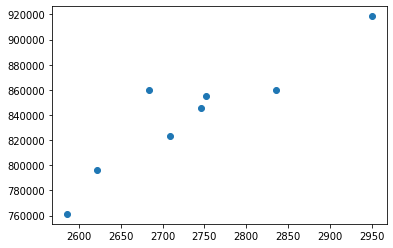

In [30]:
plt.scatter(x=yearly_df["mean_rent"], y=yearly_df["home_value"])
plt.show

In [31]:
yearly_df.corr()

,home_value,mean_rent
home_value,1.00000,0.91681
mean_rent,0.91681,1.00000


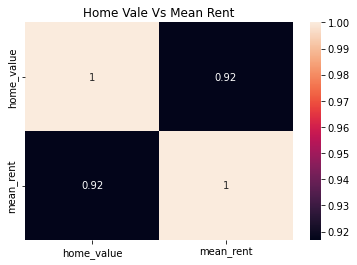

In [33]:
correlation_matrix = yearly_df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Home Vale Vs Mean Rent")
plt.show()

In [34]:
#zillow home
monthly1 = (five_boros_home["date"].dt.to_period("M"))
monthly_home_value = five_boros_home.groupby(monthly1)["home_value"].mean().to_frame()
monthly_home_value = monthly_home_value.reset_index()

#zillow rent
monthly2 = (five_boros_rent["date"].dt.to_period("M"))
monthly_rent = five_boros_rent.groupby(monthly2)["mean_rent"].mean().to_frame()
monthly_rent = monthly_rent.reset_index()



In [35]:
monthly_df = pd.merge(monthly_home_value, monthly_rent, on = "date")

monthly_df

,date,home_value,mean_rent
0,2015-03,742939.034091,2552.507677
1,2015-04,748273.159091,2560.086916
2,2015-05,752131.914773,2573.801855
3,2015-06,759171.727273,2576.271181
4,2015-07,763736.607955,2581.061952
...,...,...,...
87,2022-06,925910.073446,2954.701559
88,2022-07,930027.016949,2986.123400
89,2022-08,933617.621469,3009.743571
90,2022-09,935784.056497,2997.052818


<function matplotlib.pyplot.show(close=None, block=None)>

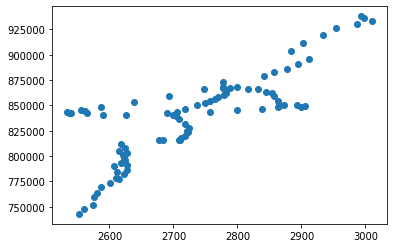

In [36]:
plt.scatter(x=monthly_df["mean_rent"], y=monthly_df["home_value"])
plt.show

<AxesSubplot: xlabel='mean_rent', ylabel='home_value'>

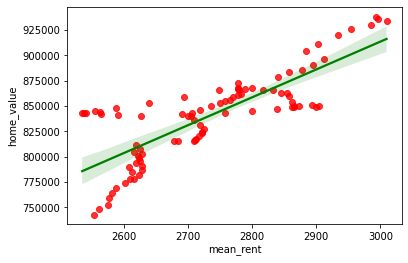

In [37]:
sns.regplot(x=monthly_df["mean_rent"], y=monthly_df["home_value"], data=monthly_df, scatter_kws={"color": "red"}, line_kws={"color" : "green"})

In [38]:
monthly_df.corr()

,home_value,mean_rent
home_value,1.000000,0.807635
mean_rent,0.807635,1.000000


In [39]:
#home value mean rent t-test
pingouin.ttest(monthly_home_value["home_value"], monthly_rent["mean_rent"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,71.940832,249.000983,two-sided,1.295003e-168,"[654198.82, 691027.32]",5.316742,1.874e+203,1.0


In [44]:
my_contingency_table = pd.crosstab(index=monthly_home_value["date"], columns=[five_boros_home['home_value'], five_boros_rent["mean_rent"]])

In [45]:
chi2_contingency(my_contingency_table)

(20.000000000000004,
 0.22022064660169877,
 16,
 array([[0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2],
        [0.2, 0.2, 0.2, 0.2, 0.2]]))

Text(0.5, 1.0, 'Mean Rent vs. Home Values (count)')

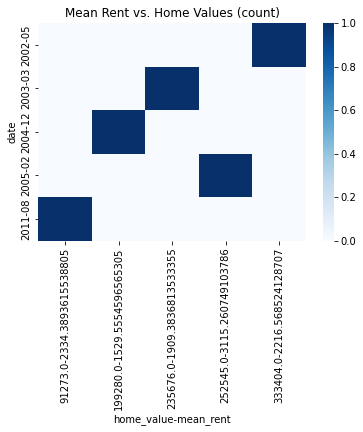

In [42]:
ax = sns.heatmap(my_contingency_table, cmap="Blues")
ax.set_title("Mean Rent vs. Home Values (count)")

In [ ]:
five_boros_rent

In [ ]:
five_boros_home

In [ ]:
df = pd.merge(five_boros_rent, five_boros_home, how = "inner", on = "borough")

df